In [1]:
import numpy as np

import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import Callback

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df_red = pd.read_csv("red_wine.csv", sep=";")
df_white = pd.read_csv("white_wine.csv", sep=";")

In [3]:
print(df_white.shape)
print(df_red.shape)

(4898, 12)
(1599, 12)


In [4]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Classification

In [6]:
y = [0] * df_white.shape[0] + [1] * df_red.shape[0]

In [7]:
num_features = df_red.shape[1] - 1

num_features

11

In [8]:
features = np.vstack((df_red.iloc[:, :-1], 
                      df_white.iloc[:, :-1]))

features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(features, y, test_size=0.2, random_state=0)

In [10]:
model = Sequential()
model.add(Dense(32, input_shape=(num_features,)))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                384       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [12]:
class TrainHistory(Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.val_loss = []
        self.acc = []
        self.val_acc = []
        self.best_val_loss = np.inf
        self.best_val_acc = -np.inf

    def on_epoch_end(self, batch, logs={}):
        
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

        loss, acc = logs.get('val_loss'), logs.get('val_acc')

        if loss and loss < self.best_val_loss:
            self.best_val_loss = loss
        
        if acc and acc > self.best_val_acc:
            self.best_val_acc = acc

In [13]:
N_EPOCHS = 10

history = TrainHistory()

model.fit(X_train, Y_train, epochs=N_EPOCHS, batch_size=32, validation_data=(X_test, Y_test), callbacks=[history]);

Train on 5197 samples, validate on 1300 samples
Epoch 1/10
5197/5197 [==============================] - 1s 144us/step - loss: 0.5391 - acc: 0.7302 - val_loss: 0.4577 - val_acc: 0.7808
Epoch 2/10
5197/5197 [==============================] - 0s 70us/step - loss: 0.4255 - acc: 0.7983 - val_loss: 0.4180 - val_acc: 0.7962
Epoch 3/10
5197/5197 [==============================] - 1s 100us/step - loss: 0.3968 - acc: 0.8124 - val_loss: 0.4014 - val_acc: 0.8000
Epoch 4/10
5197/5197 [==============================] - 0s 95us/step - loss: 0.3849 - acc: 0.8160 - val_loss: 0.3960 - val_acc: 0.8015
Epoch 5/10
5197/5197 [==============================] - 1s 98us/step - loss: 0.3783 - acc: 0.8178 - val_loss: 0.3933 - val_acc: 0.8015
Epoch 6/10
5197/5197 [==============================] - 0s 84us/step - loss: 0.3749 - acc: 0.8189 - val_loss: 0.3916 - val_acc: 0.8062
Epoch 7/10
5197/5197 [==============================] - 0s 88us/step - loss: 0.3723 - acc: 0.8220 - val_loss: 0.3899 - val_acc: 0.8008
Epoch

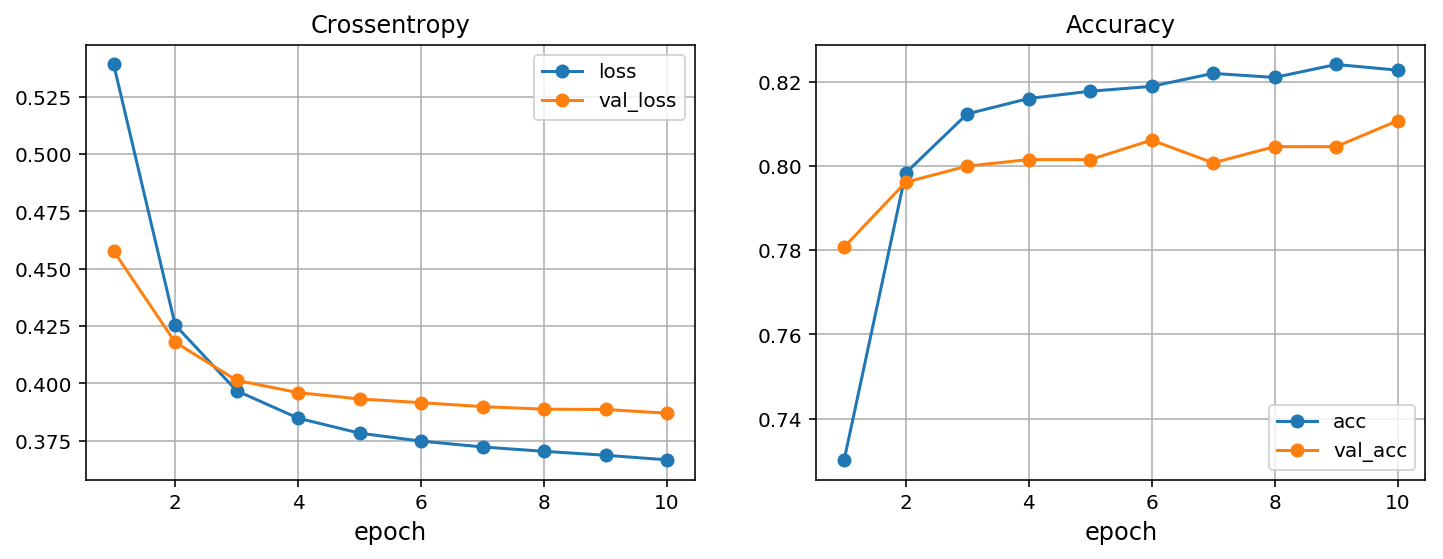

In [14]:
epochs = np.linspace(1, N_EPOCHS, N_EPOCHS)

plt.figure(figsize=(12, 4))

plt.subplot(121)

plt.plot(epochs, history.loss, "-o", label="loss")
plt.plot(epochs, history.val_loss, "-o", label="val_loss")
plt.title("Cross entropy")
plt.xlabel("epoch", size=12)
plt.grid(True)
plt.legend();

plt.subplot(122)

plt.plot(epochs, history.acc, "-o", label="acc")
plt.plot(epochs, history.val_acc, "-o", label="val_acc")
plt.title("Accuracy")
plt.xlabel("epoch", size=12)
plt.grid(True)
plt.legend();

In [15]:
print("Best loss:", history.best_val_loss) 
print("Best accuracy:", history.best_val_acc)

Best loss: 0.38703251334337085
Best accuracy: 0.8107692307692308


### Regression

In [16]:
y = np.array(df_white['quality'].tolist() + df_red['quality'].tolist())
y = y / 10

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(features, y, test_size=0.2, random_state=0)

In [18]:
model = Sequential()
model.add(Dense(32, input_shape=(num_features,)))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse')

In [19]:
N_EPOCHS = 10
history = TrainHistory()

model.fit(X_train, Y_train, epochs=N_EPOCHS, batch_size=32, validation_data=(X_test, Y_test), callbacks=[history]);

Train on 5197 samples, validate on 1300 samples
Epoch 1/10
5197/5197 [==============================] - 1s 133us/step - loss: 0.0109 - val_loss: 0.0091
Epoch 2/10
5197/5197 [==============================] - 0s 65us/step - loss: 0.0086 - val_loss: 0.0084
Epoch 3/10
5197/5197 [==============================] - 0s 80us/step - loss: 0.0082 - val_loss: 0.0082
Epoch 4/10
5197/5197 [==============================] - 0s 86us/step - loss: 0.0080 - val_loss: 0.0080
Epoch 5/10
5197/5197 [==============================] - 0s 74us/step - loss: 0.0079 - val_loss: 0.0080
Epoch 6/10
5197/5197 [==============================] - 0s 67us/step - loss: 0.0078 - val_loss: 0.0080
Epoch 7/10
5197/5197 [==============================] - 0s 61us/step - loss: 0.0077 - val_loss: 0.0079
Epoch 8/10
5197/5197 [==============================] - 0s 55us/step - loss: 0.0077 - val_loss: 0.0078
Epoch 9/10
5197/5197 [==============================] - 0s 56us/step - loss: 0.0077 - val_loss: 0.0079
Epoch 10/10
5197/5197 [=

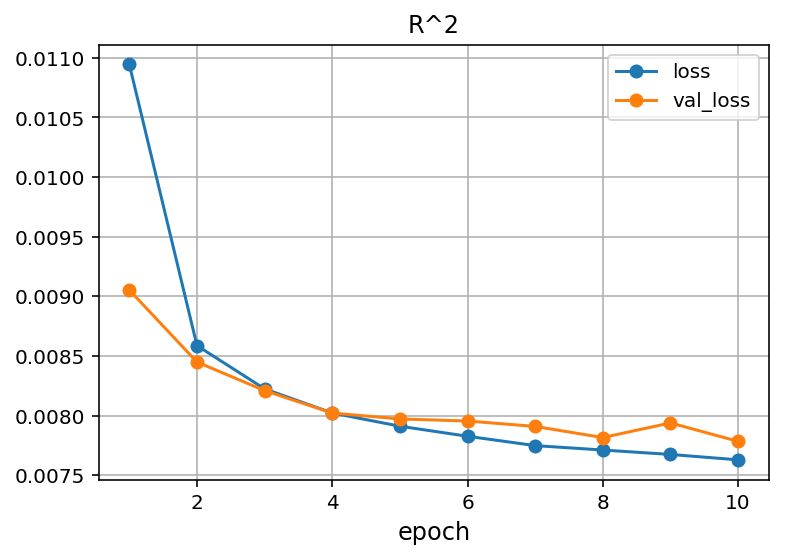

In [20]:
epochs = np.linspace(1, N_EPOCHS, N_EPOCHS)

plt.figure(figsize=(6, 4))

plt.plot(epochs, history.loss, "-o", label="loss")
plt.plot(epochs, history.val_loss, "-o", label="val_loss")
plt.title("R^2")
plt.xlabel("epoch", size=12)
plt.grid(True)
plt.legend();

In [21]:
print("Best loss:", history.best_val_loss) 

Best loss: 0.007783648191163173
